## Figure 1: del Molino et al, eLife 2017

This is a reproduction of del Molino et al. 2017 using NeuroML2/LEMS


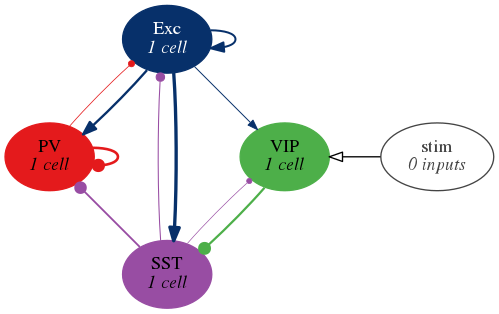

In [1]:
from IPython.display import Image
Image("../Fig1a.png")

pyNeuroML >>> Reloading data specified in LEMS file: ../LEMS_RateBased.xml (/Users/jessica/Dropbox/GSoC/code/LEMS_RateBased.xml), base_dir: ., cwd: /Users/jessica/Dropbox/GSoC/code/notebooks
pyNeuroML >>> Reloading: Data loaded from ./rates.dat (jNeuroML)


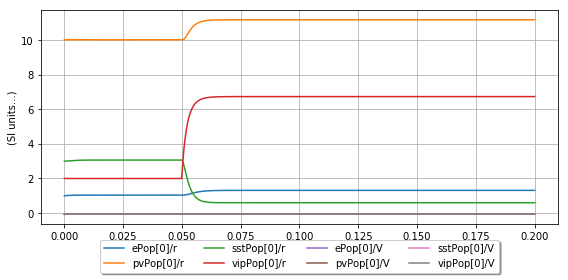

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline  
from pyneuroml import pynml
lems_file='../LEMS_RateBased.xml'
results = pynml.run_lems_with_jneuroml(lems_file, nogui=True, load_saved_data=True, plot=True)

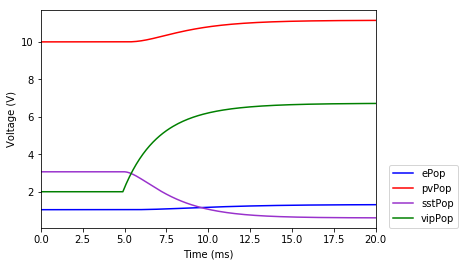

In [67]:
# reproduce Fig 1c - Low Baseline activity

# t=0 corresponds to the time point of the modulatory input
T = max(results['t']) * 1000
timeLine = [t * 1000 - T/4 + 5 for t in results['t']]
plt.plot(timeLine, results['ePop[0]/r'], label='ePop', color='blue')
plt.plot(timeLine, results['pvPop[0]/r'], label='pvPop', color='red')
plt.plot(timeLine, results['sstPop[0]/r'], label='sstPop', color='darkorchid')
plt.plot(timeLine, results['vipPop[0]/r'], label='vipPop', color='green')

plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.xlim(xmin=0, xmax=20)
plt.legend(loc=(1.04,0))